# SAM
With a fined tuned model, we can also make an attempt at zero-shot segmentation using the Segment-Anything-Model (SAM) by using the predicted bounding boxes, from the fine tuned YOLOv8 model.

In [5]:
from ultralytics import YOLO
from ultralytics.nn.tasks import DetectionModel
import torch

# Setup Model
Let's setup a YOLOv8 model with our saved weights and model architecture.

In [6]:
det = DetectionModel("model.yaml")
det.load(torch.load("run_data/runs/detect/train/weights/best.pt"))
yolo = YOLO(model="run_data/runs/detect/train/weights/best.pt", task="detect")  # load a pretrained model (recommended for training)
yolo.model = det


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

# Zero Shot Prediction
Let's load the demo images, feed them to our YOLO model to get the predictions, and then give the images and predicted bounding boxes to SAM.

Note that on the first run you have to download the SAM weights (358MB).

In [3]:
from ultralytics import SAM

# Load a model
sam = SAM('sam_b.pt')

# Display model information (optional)
sam.info()

# Run inference with bboxes prompt
#model('ultralytics/assets/zidane.jpg', bboxes=[439, 437, 524, 709])


Model summary: 238 layers, 93735472 parameters, 93735472 gradients


(238, 93735472, 93735472, 0)

In [22]:
img = "../demo_images/train_img_for_test.jpg"
img = "../demo_images/demo_garbage.jpeg"
bboxes = yolo(img)


image 1/1 /home/jonasbarth/Desktop/uni/msc/year-2/aml/final-project/final-project/yolo/../demo_images/demo_garbage.jpeg: 480x640 2 0s, 50.5ms
Speed: 2.2ms preprocess, 50.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


# Segmentation
Run the segmentation using the bounding boxes from the YOLO prediction.

In [23]:
segmentation = sam(img, bboxes=bboxes[0].boxes.xyxy)

image 1/1 /home/jonasbarth/Desktop/uni/msc/year-2/aml/final-project/final-project/yolo/../demo_images/demo_garbage.jpeg: 1024x1024 5494.6ms
Speed: 9.0ms preprocess, 5494.6ms inference, 4.4ms postprocess per image at shape (1, 3, 1024, 1024)


We can directly plot the segmentation image.

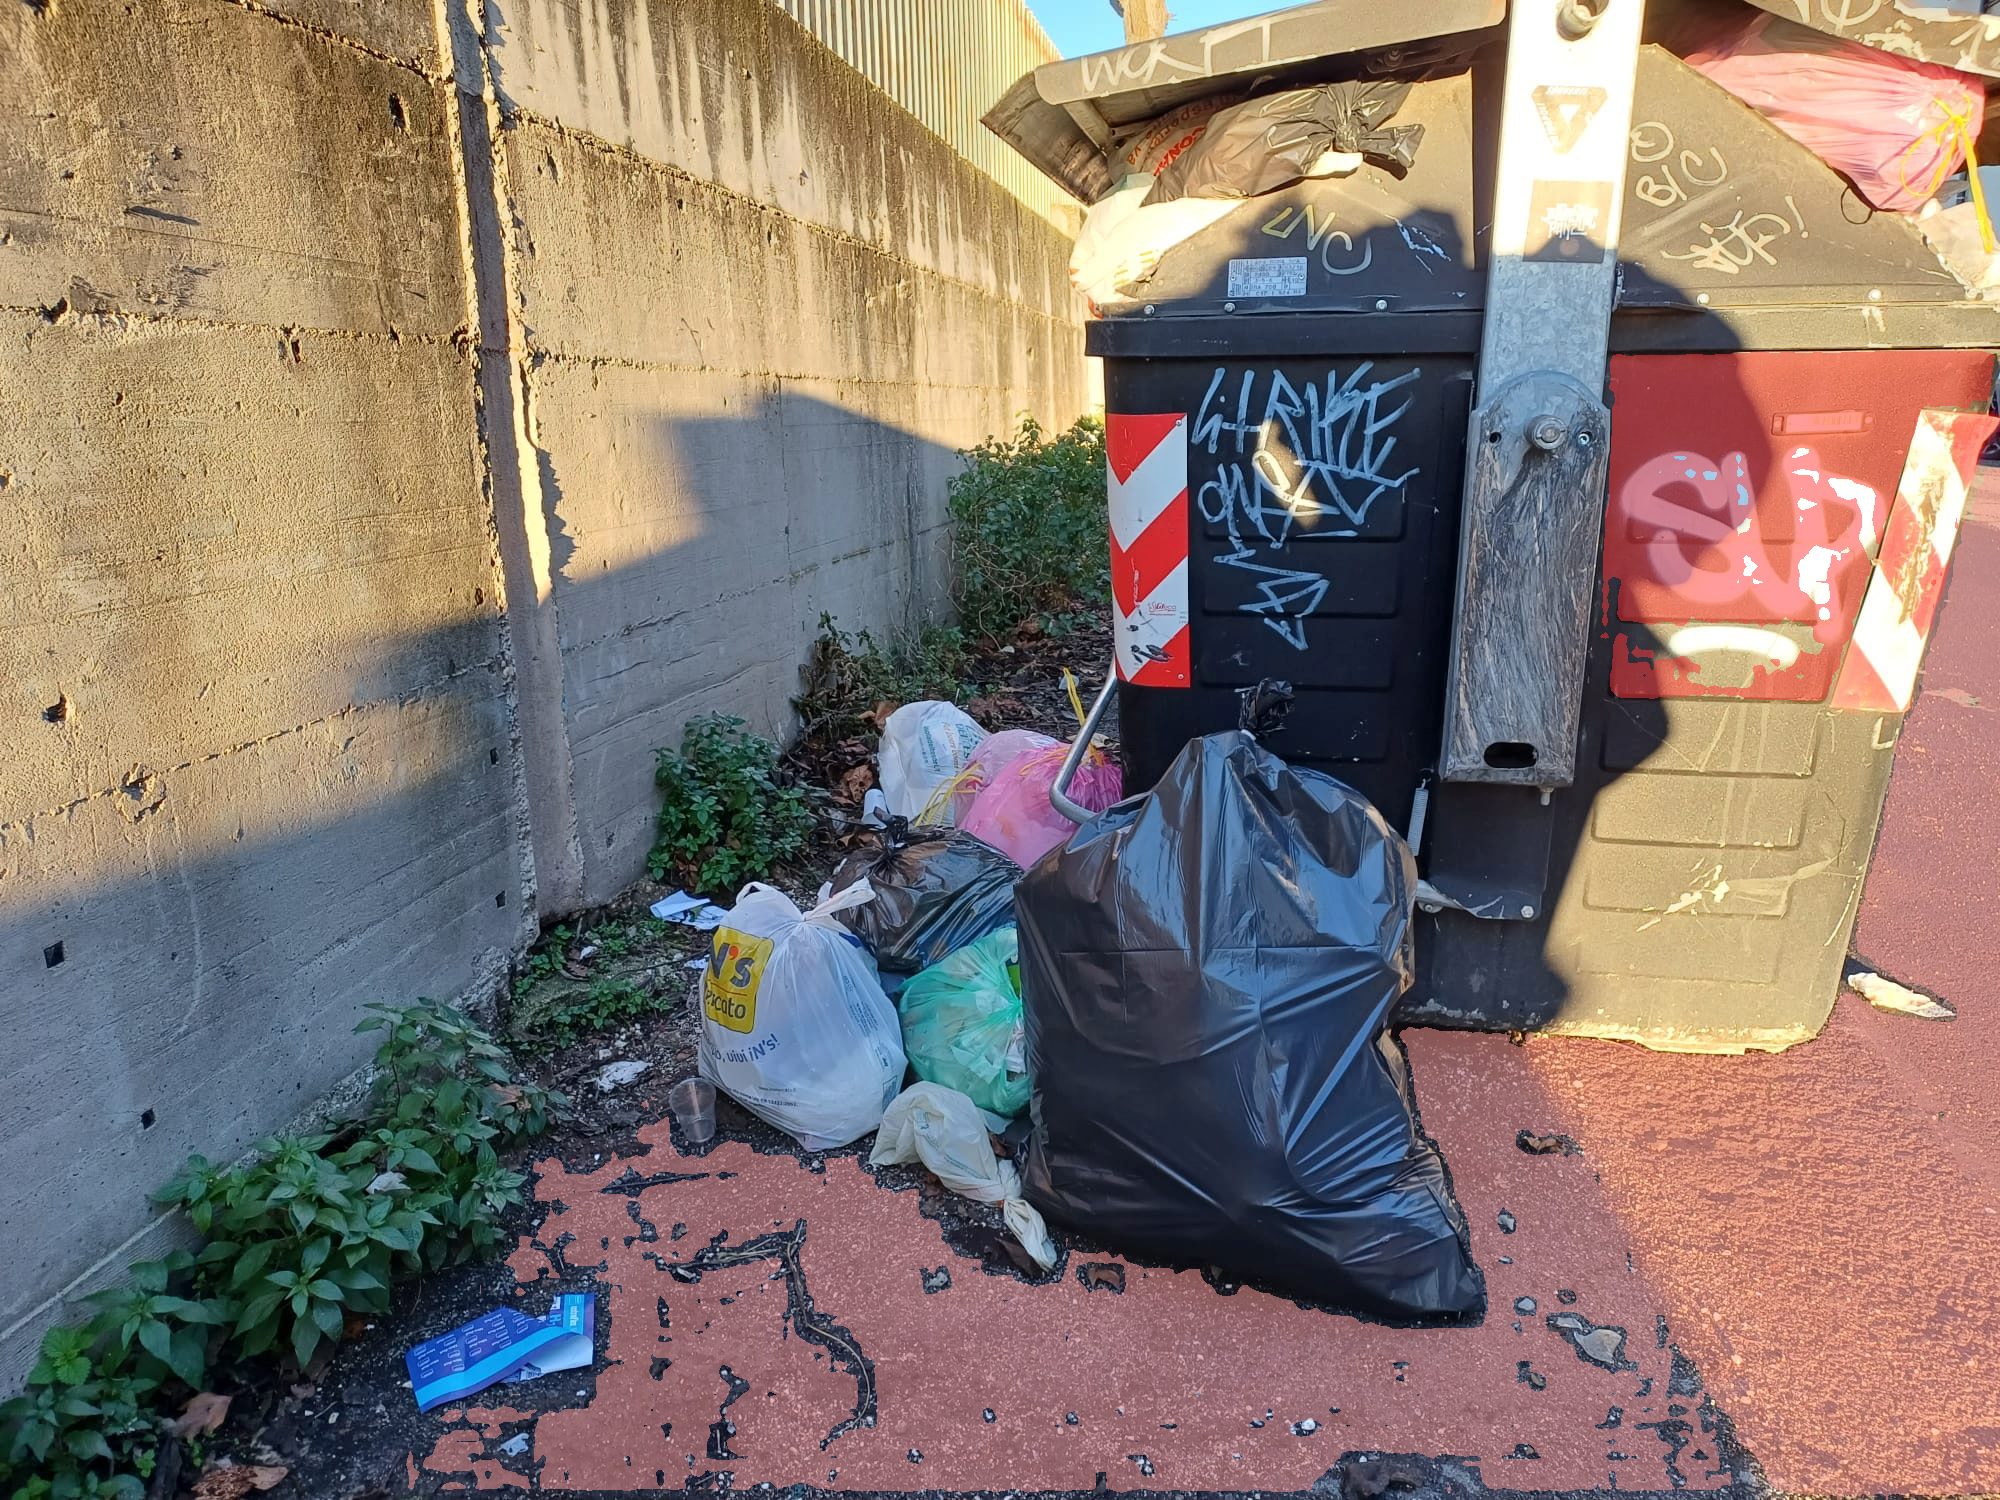

In [25]:
import cv2
from PIL import Image

out_img = segmentation[0].plot()
im = cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR)
Image.fromarray(im)